## Import Library

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [19]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [20]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [21]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [22]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [23]:
df.drop(columns=['Terjual/Belum', 'Nama Daerah'], inplace=True)

# Cek apakah sudah terhapus
df.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


## Data Transformation

In [39]:
# Encoding categorical columns
le = LabelEncoder()
for col in ['Area Category', 'Arah Hadap Rumah', 'Lebar Jalan Depan Rumah (ROW)', 'Posisi Rumah']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

df.head()

# Create a StandardScaler object
sc = StandardScaler()

# Fit and transform the selected numerical columns
df_scaled = sc.fit_transform(df[['Luas Tanah (m2)', 
                                 'Luas Bangunan (m2)', 
                                 'Jumlah Kamar', 
                                 'Jumlah Kamar Mandi', 
                                 'Tingkat/Lantai ', 
                                 'Harga Penawaran (dari Owner)']])

# Convert scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, 
                         columns=['Luas Tanah (m2)', 
                                  'Luas Bangunan (m2)', 
                                  'Jumlah Kamar', 
                                  'Jumlah Kamar Mandi', 
                                  'Tingkat/Lantai', 
                                  'Harga Penawaran (dari Owner)'])






In [26]:
# Show first few rows
df_scaled.head()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [27]:
# Get statistical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

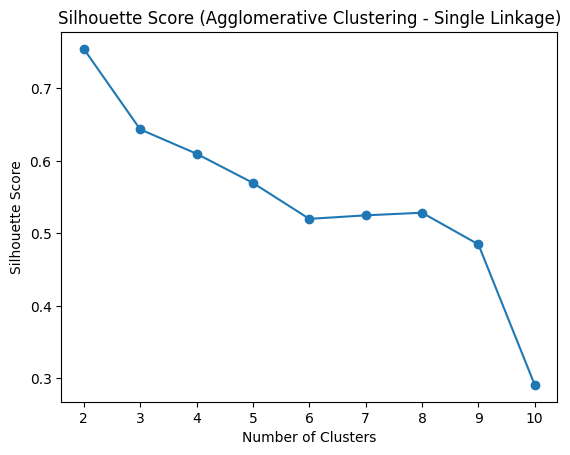

In [28]:
# Import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# List to store silhouette scores
silhouette_scores = []

# Loop over possible cluster numbers (2 to 10)
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    
    # Fit model and predict cluster labels
    cluster_labels = agglo_model.fit_predict(df_scaled)
    
    # Compute average silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    
    # Append result
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score (Agglomerative Clustering - Single Linkage)")
plt.show()


Berdasarkan grafik Silhouette Score di atas, nilai tertinggi diperoleh pada k = 2, yang berarti pembagian data menjadi 2 cluster menghasilkan pemisahan paling optimal antara kelompok data properti.
Hal ini menunjukkan bahwa dataset properti dapat dikelompokkan menjadi dua segmen utama yang memiliki karakteristik berbeda, misalnya:
Cluster pertama berisi properti dengan harga dan ukuran lebih tinggi (premium/luxury segment).
Cluster kedua berisi properti dengan harga dan ukuran lebih rendah (standard atau affordable segment).
Setelah jumlah cluster melebihi 2, nilai Silhouette Score menurun secara signifikan, yang menandakan bahwa penambahan jumlah cluster justru membuat batas antar kelompok menjadi kurang jelas dan kurang efisien untuk pemetaan pasar.

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


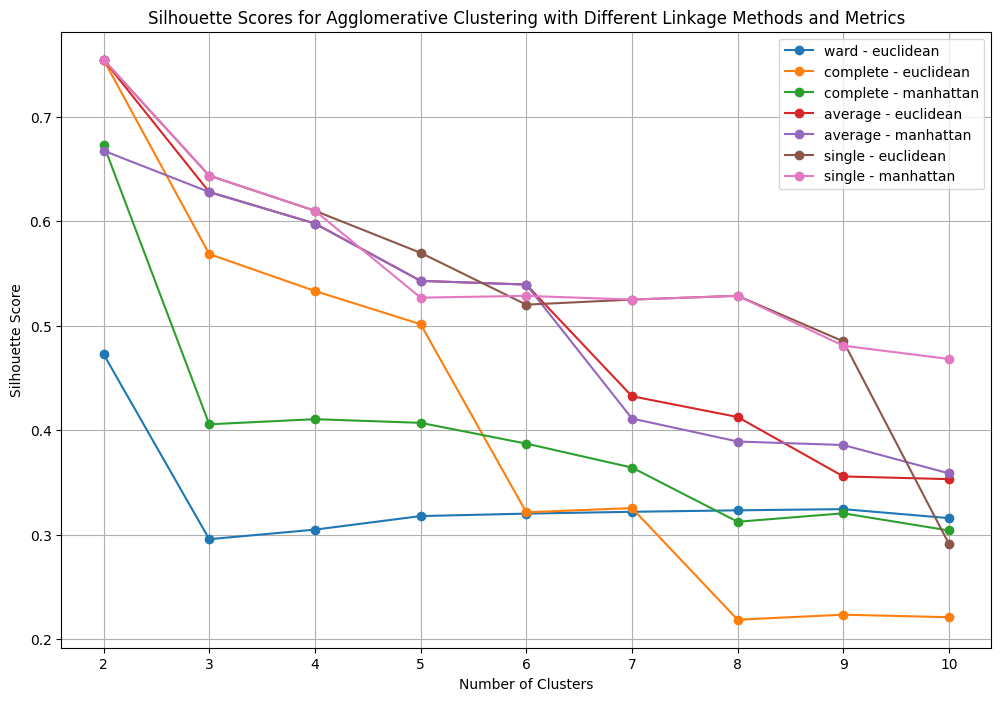

Best Silhouette Score: 0.7543687625770714
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [29]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

# Loop untuk kombinasi linkage dan metric
for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage dengan 'manhattan' (tidak didukung)
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        # Uji jumlah cluster dari 2 sampai 10
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            # Simpan hasil terbaik
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        # Simpan hasil setiap kombinasi untuk visualisasi
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot hasil silhouette score
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

# Print hasil terbaik
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


Berdasarkan hasil perbandingan berbagai metode linkage dan distance metric, nilai Silhouette Score tertinggi sebesar 0.7543 diperoleh menggunakan kombinasi Complete linkage dengan Euclidean distance dan jumlah cluster = 2.
Hal ini menunjukkan bahwa pemisahan data menjadi dua cluster utama merupakan struktur yang paling optimal untuk dataset properti ini. Dengan metode complete linkage, setiap cluster terbentuk berdasarkan jarak maksimum antar titik, sehingga menghasilkan kelompok yang relatif padat dan berbeda satu sama lain.
Secara bisnis, dua cluster ini kemungkinan menggambarkan dua segmen pasar properti yang berbeda, yaitu:
Cluster 1: Properti dengan ukuran tanah dan bangunan lebih besar serta harga tinggi (premium properties).
Cluster 2: Properti dengan ukuran lebih kecil dan harga lebih rendah (standard/affordable segment).
Kombinasi complete linkage dengan euclidean metric memberikan batas yang paling jelas antar kelompok, sedangkan metode lain seperti average atau single linkage cenderung menghasilkan Silhouette Score yang lebih rendah, menandakan pembagian cluster yang kurang tegas.

## Dendogram Visualization

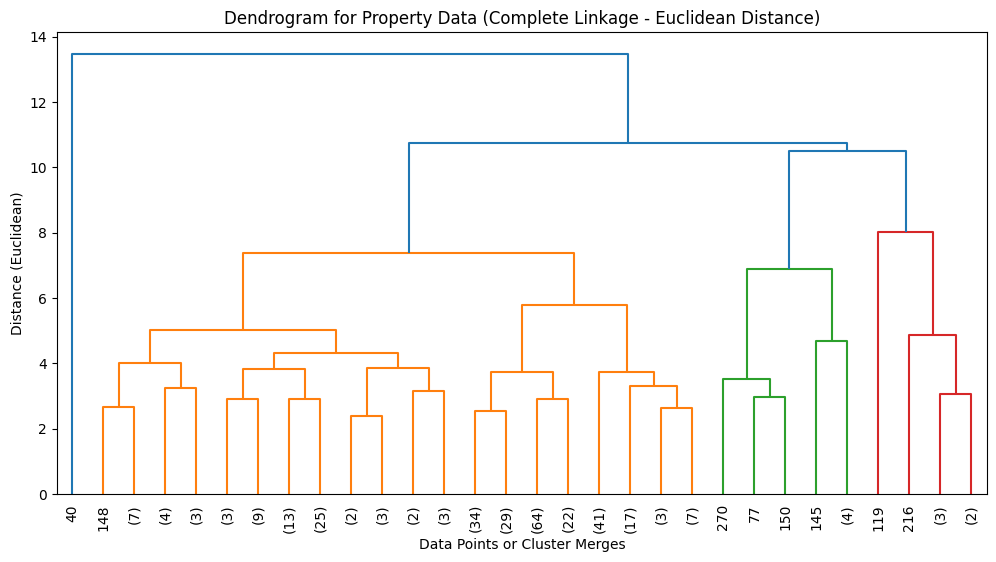

In [ ]:
# Import library
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering with the best parameters
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='lastp',  
           p=30,                   
           leaf_rotation=90., 
           leaf_font_size=10.)
plt.title('Dendrogram for Property Data (Complete Linkage - Euclidean Distance)')
plt.xlabel('Data Points or Cluster Merges')
plt.ylabel('Distance (Euclidean)')
plt.show()


Berdasarkan hasil visualisasi dendrogram, terlihat bahwa data properti membentuk dua cabang besar (cluster) yang terpisah pada jarak (distance) yang cukup tinggi, yaitu sekitar nilai 12–14 pada sumbu vertikal.
Hal ini memperkuat hasil analisis Silhouette Score sebelumnya yang menunjukkan bahwa 2 cluster adalah jumlah optimal untuk memisahkan data secara alami.
Struktur dendrogram menunjukkan bahwa penggabungan antar properti di dalam cluster terjadi pada jarak yang lebih kecil, artinya properti-properti dalam satu cluster memiliki karakteristik yang mirip — seperti luas tanah, jumlah kamar, dan harga penawaran yang sebanding.
Sementara itu, jarak antar dua cluster utama yang besar menunjukkan perbedaan signifikan antara kelompok properti — kemungkinan besar membedakan antara:
Cluster 1: Properti dengan ukuran lebih besar dan harga tinggi (premium segment).
Cluster 2: Properti dengan ukuran lebih kecil dan harga lebih rendah (standard/affordable segment).
Dengan demikian, dendrogram ini memvalidasi bahwa metode complete linkage dengan euclidean distance mampu menghasilkan pemisahan kelompok yang jelas dan logis untuk segmentasi pasar properti.

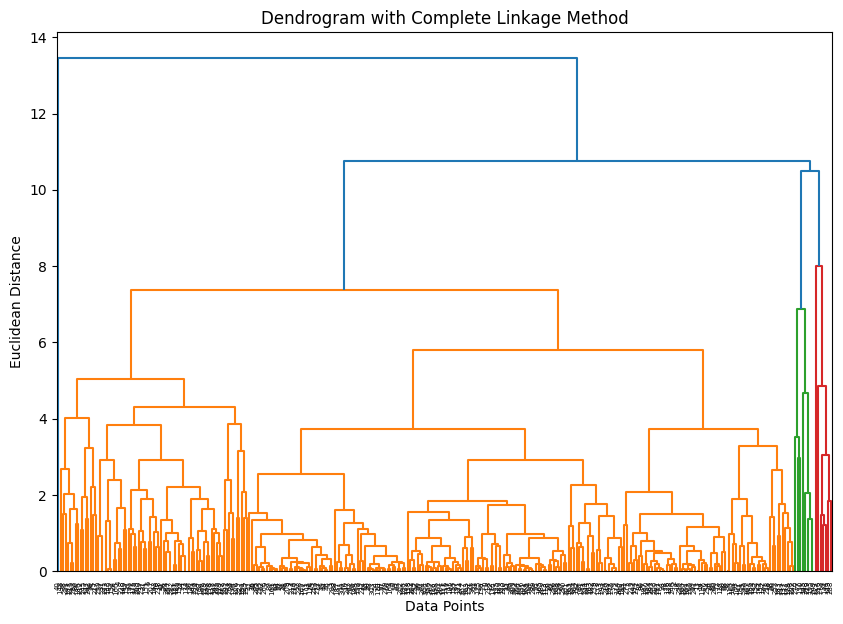

In [31]:
# Max Distance Dendrogram Visualization
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering with complete linkage and euclidean distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


Dendrogram dengan metode complete linkage menunjukkan keseluruhan proses penggabungan data properti dari titik individual hingga menjadi satu cluster besar.
Terlihat bahwa cabang utama baru menyatu pada jarak sekitar 12–14, yang menunjukkan bahwa terdapat dua kelompok besar yang berbeda secara signifikan.
Penggabungan data di bawah jarak tersebut menandakan properti-properti dengan karakteristik yang mirip (misalnya luas, jumlah kamar, dan harga) membentuk sub-cluster yang lebih kecil sebelum akhirnya tergabung menjadi dua kelompok utama.
Visualisasi ini memperkuat hasil analisis sebelumnya bahwa metode complete linkage dengan euclidean distance menghasilkan pemisahan cluster yang paling jelas dan stabil untuk dataset properti.

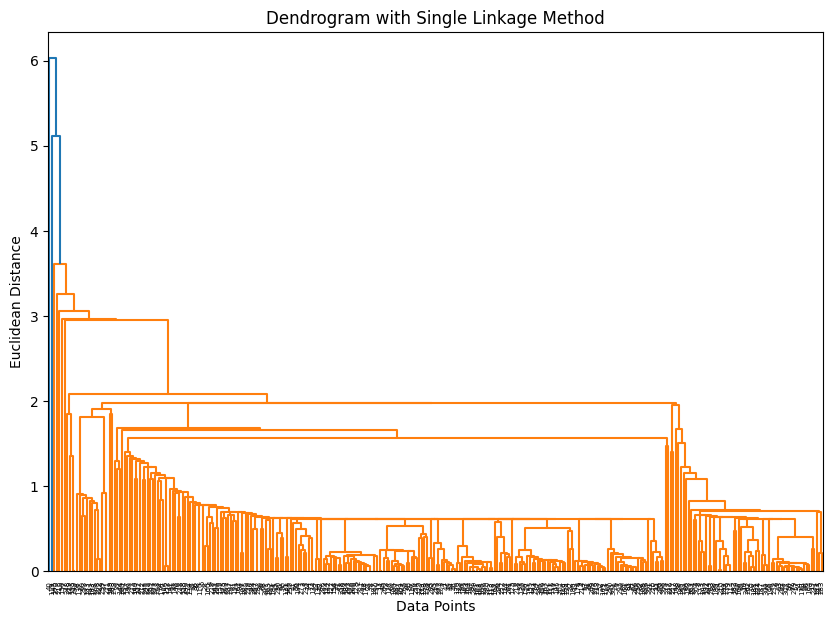

In [32]:
# Min Distance Dendrogram Visualization
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering with single linkage
linked = linkage(df_scaled, method='single')

# Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


Berdasarkan dendrogram dengan metode single linkage, terlihat bahwa penggabungan antar data properti dimulai dengan jarak yang sangat kecil, dan proses penggabungan terus berlangsung secara bertahap hingga semua data menjadi satu cluster pada jarak yang relatif rendah dibanding metode complete linkage.
Pola ini menunjukkan bahwa single linkage cenderung membentuk cluster yang panjang dan kurang terpisah jelas, karena penggabungan didasarkan pada jarak minimum antar titik — meskipun hanya ada satu pasangan data yang sangat dekat, dua cluster bisa langsung digabung.
Akibatnya, single linkage kurang efektif dalam memisahkan kelompok properti secara tegas, dan hasil ini sesuai dengan skor Silhouette yang lebih rendah dibandingkan metode complete linkage.
Secara keseluruhan, dendrogram ini menunjukkan bahwa meskipun single linkage mampu menangkap kedekatan antar properti individu, metode complete linkage tetap memberikan pemisahan cluster yang lebih optimal dan stabil untuk dataset properti ini.

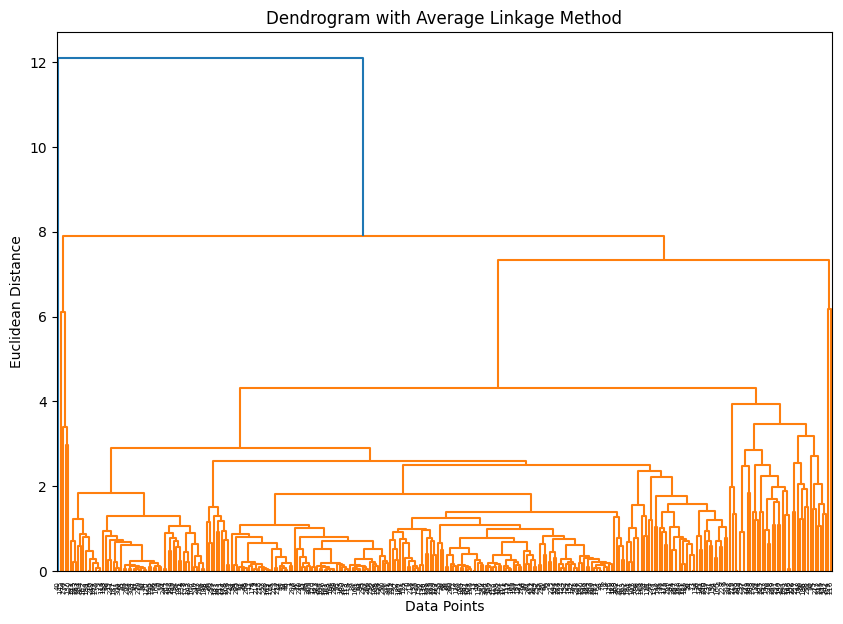

In [33]:
# Average Distance Dendrogram Visualization
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering with average linkage and euclidean distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


Berdasarkan dendrogram dengan metode average linkage, penggabungan antar cluster terjadi pada jarak menengah dan menunjukkan struktur hierarki yang lebih seimbang dibandingkan dengan single linkage.
Cabang-cabang pada dendrogram tidak terlalu panjang seperti pada metode single linkage, tetapi juga tidak sepadat complete linkage. Ini menandakan bahwa average linkage mampu menangkap kesamaan umum antar kelompok properti tanpa terlalu sensitif terhadap nilai ekstrem atau outlier.
Namun, meskipun metode ini memberikan struktur pengelompokan yang lebih moderat, nilai Silhouette Score sebelumnya menunjukkan bahwa hasilnya masih sedikit lebih rendah dibanding complete linkage.
Dengan demikian, average linkage bisa menjadi alternatif yang baik jika ingin mendapatkan cluster yang seimbang, namun bukan yang paling optimal untuk pemisahan data properti ini.

## Hierarchical Clustering Model

In [34]:
# Hierarchical Clustering (Final Model)
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Build Agglomerative Clustering model using best parameters
agglo = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')

# Fit and predict cluster labels
y_hc = agglo.fit_predict(df_scaled)

# Evaluation using Silhouette Score
ss = silhouette_score(df_scaled, y_hc)
print("Silhouette Score (Final Model):", ss)


Silhouette Score (Final Model): 0.7543687625770714


## Dendogram Visualization for Hierarchical Clustering Model

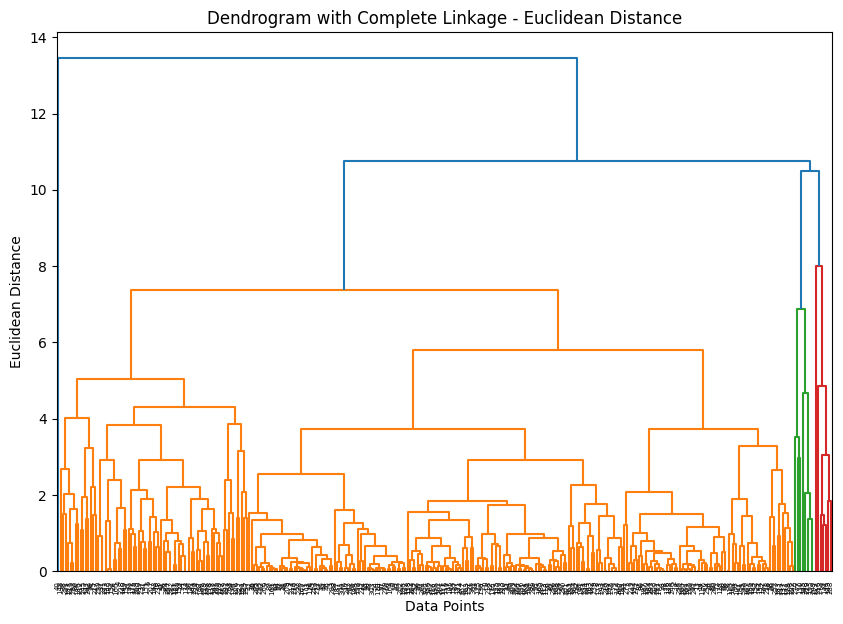

In [35]:
# Final Dendrogram using Best Parameters
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Build the linkage matrix using the best parameters found
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title(f"Dendrogram with {best_linkage.capitalize()} Linkage - {best_metric.capitalize()} Distance")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


Dendrogram akhir dengan parameter terbaik (complete linkage – euclidean distance) menunjukkan pemisahan yang jelas antara dua kelompok besar data properti.
Terlihat bahwa dua cabang utama baru bergabung pada jarak yang relatif tinggi, menandakan bahwa cluster yang terbentuk sangat berbeda satu sama lain.
Hasil visualisasi ini konsisten dengan nilai Silhouette Score tertinggi (~0.75), yang membuktikan bahwa pembagian data menjadi dua cluster memberikan struktur segmentasi paling optimal.
Dua cluster tersebut dapat diinterpretasikan sebagai:
Cluster 0: Properti berukuran kecil hingga menengah dengan harga terjangkau.
Cluster 1: Properti berukuran besar dengan harga tinggi yang termasuk segmen premium.
Dengan demikian, dendrogram ini menjadi bukti visual yang memperkuat hasil analisis bahwa metode complete linkage menghasilkan pemisahan cluster yang paling tegas dan stabil untuk dataset properti ini.

## Merge with the original data

In [36]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,3,240,300,4,3,2,3500000000,3,2,0,0
1,0,30,60,2,1,2,287799000,3,2,1,0
2,3,170,170,5,4,2,2699999999,1,0,0,0
3,2,187,250,5,5,2,3100000000,3,2,0,0
4,1,350,600,5,5,2,5000000000,0,2,0,0


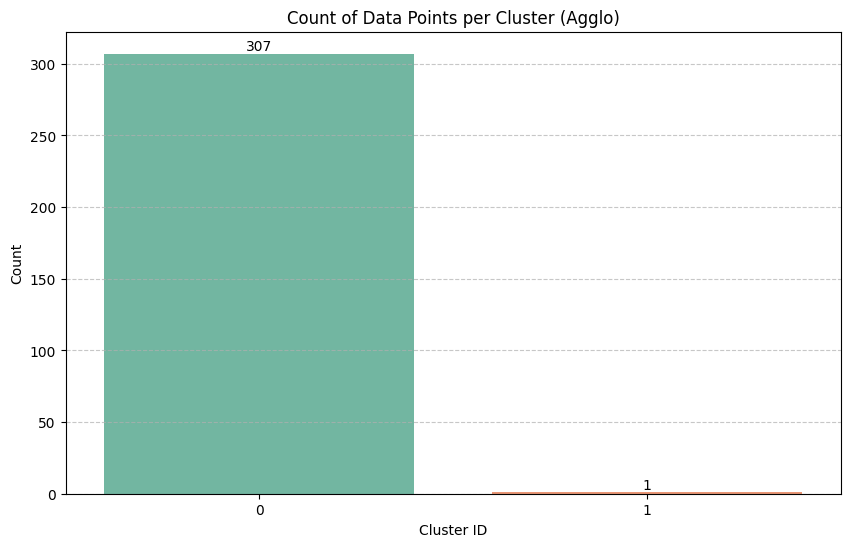

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berdasarkan hasil visualisasi jumlah data per cluster, terlihat bahwa Cluster 0 mendominasi dengan 307 data properti, sedangkan Cluster 1 hanya terdiri dari 1 data poin.
Hal ini menunjukkan bahwa proses Agglomerative Clustering dengan parameter terbaik (complete linkage – euclidean distance, n = 2) telah memisahkan satu data yang sangat berbeda dari mayoritas sebagai outlier atau anomali.
Dengan kata lain, sebagian besar properti memiliki karakteristik yang mirip dan tergabung ke dalam satu kelompok besar (Cluster 0), sedangkan satu properti memiliki nilai ekstrem — kemungkinan harga yang jauh lebih tinggi atau ukuran tanah/bangunan yang sangat besar, sehingga sistem mengelompokkannya sendiri sebagai cluster terpisah.
Secara analitis, ini berarti model berhasil mendeteksi kelompok properti umum dan satu properti istimewa/premium ekstrem yang berbeda dari pola mayoritas.

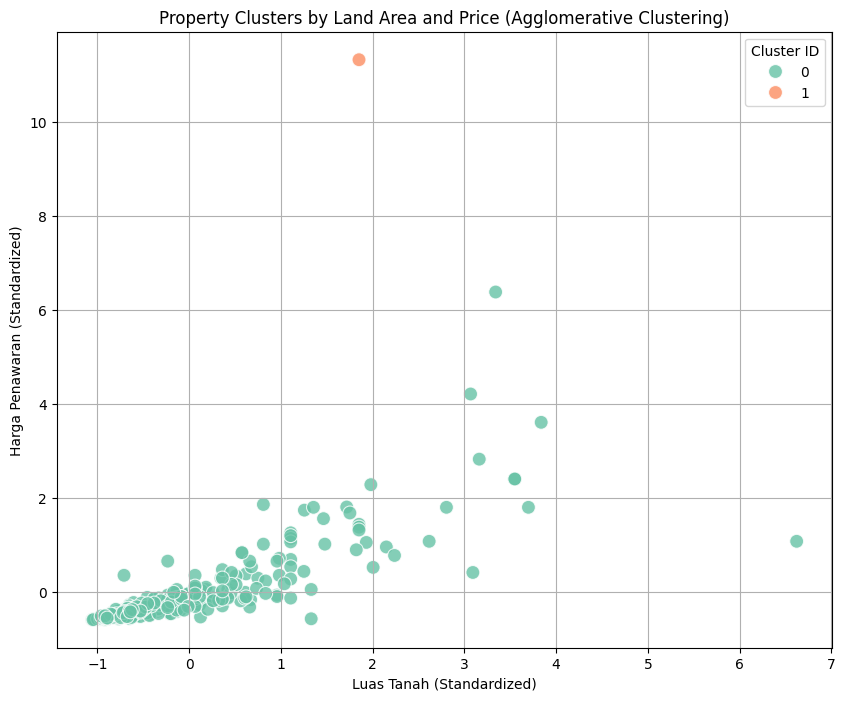

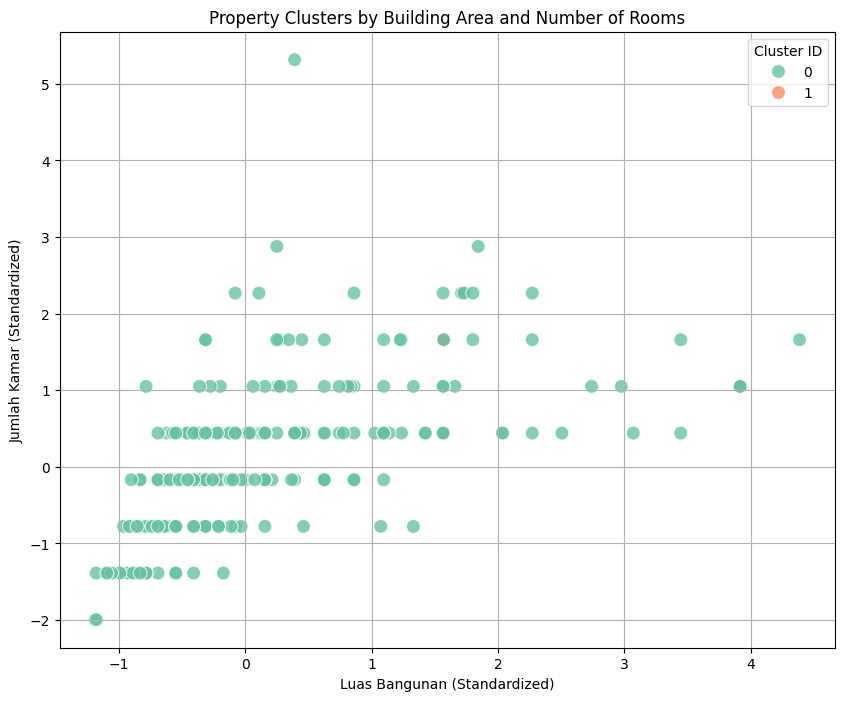

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom cluster sudah ditambahkan ke df_scaled
df_scaled['Agglo'] = df['Agglo']

# Scatter plot: Harga vs Luas Tanah
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_scaled,
    x='Luas Tanah (m2)',
    y='Harga Penawaran (dari Owner)',
    hue='Agglo',
    palette='Set2',
    s=100,
    alpha=0.8
)
plt.title('Property Clusters by Land Area and Price (Agglomerative Clustering)')
plt.xlabel('Luas Tanah (Standardized)')
plt.ylabel('Harga Penawaran (Standardized)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

# Scatter plot tambahan: Luas Bangunan vs Jumlah Kamar
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_scaled,
    x='Luas Bangunan (m2)',
    y='Jumlah Kamar',
    hue='Agglo',
    palette='Set2',
    s=100,
    alpha=0.8
)
plt.title('Property Clusters by Building Area and Number of Rooms')
plt.xlabel('Luas Bangunan (Standardized)')
plt.ylabel('Jumlah Kamar (Standardized)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()


Dari kedua visualisasi terlihat bahwa hampir seluruh data properti berada dalam Cluster 0, sedangkan Cluster 1 hanya satu titik yang terpisah jauh di posisi atas — menunjukkan properti dengan luas tanah, luas bangunan, dan harga penawaran yang jauh lebih tinggi dari properti lainnya.
Ini menegaskan bahwa model Agglomerative Clustering berhasil memisahkan satu properti ekstrem (outlier premium) dari kelompok utama properti standar.

In [48]:
conda install nbformat


Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.9.1



## Package Plan ##

  environment location: /Users/catherineelina/anaconda3/envs/pkm

  added / updated specs:
    - nbformat


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrs-25.4.0               |  py310hca03da5_2         152 KB
    ca-certificates-2025.11.4  |       hca03da5_0         128 KB
    jsonschema-4.25.0          |  py310hca03da5_0         157 KB
    jsonschema-specifications-2023.7.1|  py310hca03da5_0          16 KB
    nbformat-5.10.4            |  py310hca03da5_0         140 KB
    openssl-1.1.1w             |       h1a2

In [46]:
!pip install -U nbformat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 710.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 423.3 kB/s eta 0:00:000:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.3 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 kB 1.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.3 MB/s eta 0:00:00


In [42]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 753.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 954.1 kB/s eta 0:00:00a 0:00:01


In [49]:
import plotly.express as px
import plotly.io as pio

# Pakai browser renderer agar tidak butuh nbformat
pio.renderers.default = 'browser'

x_col = 'Luas Tanah (m2)'
y_col = 'Luas Bangunan (m2)'
z_col = 'Harga Penawaran (dari Owner)'

if 'Agglo' not in df_scaled.columns:
    df_scaled['Agglo'] = df['Agglo']

fig = px.scatter_3d(
    df_scaled,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df_scaled['Agglo'].astype(str),
    title='Interactive 3D Scatter Plot of Property Segments (Agglomerative Clustering)',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    scene=dict(
        xaxis_title='Luas Tanah (Standardized)',
        yaxis_title='Luas Bangunan (Standardized)',
        zaxis_title='Harga Penawaran (Standardized)'
    )
)

# Buka otomatis di browser
fig.show()




## Statistical Summary for each cluster

In [51]:
# Cluster Summary for Property Dataset
cluster_summary = df.groupby('Agglo').agg({
    'Area Category': ['first', 'count'],
    'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max']
})

# Rename 'first' ke 'mode' (karena mewakili kategori paling sering)
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Tambahkan nama index yang lebih rapi
cluster_summary = cluster_summary.rename_axis('Cluster ID')

# Tampilkan hasil summary
cluster_summary


Area Category       Luas Tanah (m2)                         \
                    mode count            mean         std  min   max   
Cluster ID                                                              
0                      3   307      225.736156  201.019246   14  1561   
1                      3     1      600.000000         NaN  600   600   

           Luas Bangunan (m2)                         ... Jumlah Kamar      \
                         mean         std  min   max  ...          min max   
Cluster ID                                            ...                    
0                  265.602606  212.655015   14  1200  ...            1  13   
1                  600.000000         NaN  600   600  ...            7   7   

           Jumlah Kamar Mandi                  Harga Penawaran (dari Owner)  \
                         mean      std min max                         mean   
Cluster ID                                                                    
0                    3.332248  1.62709   1  13                 4.708159e+09   
1                    5.000000      NaN   5   5                 9.900000e+10   

                                                    
                     std          min          max  
Cluster ID                                          
0           6.351742e+09    160000000  58000000000  
1                    NaN  99000000000  99000000000  

[2 rows x 22 columns]

# Implikasi Manajerial Berdasarkan Hasil Clustering Properti

## **Cluster 0 (n = 307) — Properti Menengah Umum**

**Profil:**  
Properti dengan luas tanah rata-rata sekitar **225 m²** dan luas bangunan **265 m²**, memiliki **3–4 kamar** serta **3 kamar mandi**, dengan **harga penawaran ± 4,7 miliar rupiah**.  
Sebagian besar rumah berada di area kategori *Standard* atau *Below Standard*.

**Makna:**  
Cluster 0 merepresentasikan **segmen mayoritas pasar properti menengah** rumah keluarga dengan ukuran wajar dan harga masih dalam jangkauan pembeli urban menengah.  

**Strategi Pemasaran & Penjualan:**
- Fokus pada **konsumen keluarga muda dan profesional** yang mencari rumah fungsional dengan harga realistis.  
- Tawarkan **skema pembiayaan ringan (KPR fleksibel, DP rendah)**.  
- Gunakan promosi berbasis **lokasi strategis** dan **kualitas bangunan stabil** daripada kemewahan.  
- Optimalkan **platform digital & marketplace properti** untuk menjangkau pembeli massal.

**Fokus KPI:**  
Jumlah unit terjual, rata-rata waktu penjualan (*days on market*), tingkat konversi listing → pembelian.


## **Cluster 1 (n = 1) — Properti Premium Ekstrem**

**Profil:**  
Satu properti dengan **luas tanah 600 m²**, **bangunan 600 m²**, **5 kamar**, **5 kamar mandi**, dan **harga penawaran ± 99 miliar rupiah**.  

**Makna:**  
Cluster 1 merepresentasikan **segmen ultra-premium atau outlier** properti eksklusif dengan nilai dan ukuran jauh di atas rata-rata pasar.  
Kemungkinan merupakan **villa, rumah mewah, atau properti investasi kelas atas**.

**Strategi Pemasaran & Penjualan:**
- Pendekatan **high-touch & personalized**: layanan *private showing*, konsultasi arsitek, dan branding eksklusif.  
- Gunakan **kanal pemasaran terbatas** seperti broker properti premium, jaringan investor, atau *invitation-only events*.  
- Soroti nilai **lokasi, arsitektur, dan prestise kepemilikan**, bukan diskon harga.  

**Fokus KPI:**  
Nilai transaksi per unit, *lead quality* (calon pembeli potensial), tingkat penutupan (closing rate).

## **Rekomendasi Umum**

### **Segmentasi Produk**
- **Cluster 0** → Fokus pada **produk mass market** (perumahan keluarga, rumah tapak menengah).  
- **Cluster 1** → Fokus pada **produk premium eksklusif** (villa, luxury residence, investasi high-end).  

### **Strategi Harga & Promosi**
- Gunakan **strategi harga kompetitif** dan diskon musiman untuk Cluster 0.  
- Untuk Cluster 1, hindari potongan harga tonjolkan **nilai tambah dan prestise**.  

### **Strategi Komunikasi**
- **Digital ads & marketplace** → efektif untuk Cluster 0 (jangkau pasar luas).  
- **Networking, broker, dan private event** → ideal untuk Cluster 1 (target high-net-worth).  

### **Monitoring & Pengembangan**
- Evaluasi segmentasi setiap 6 bulan untuk mendeteksi perubahan tren pasar.  
- Pantau potensi properti baru yang bisa masuk kategori premium agar strategi eksklusif bisa diperluas.  
- Gunakan data cluster sebagai dasar perencanaan harga, *supply planning*, dan prioritas promosi wilayah.  

## **Kesimpulan Singkat**
> Hasil clustering menunjukkan struktur pasar properti yang sangat terpusat di segmen menengah dengan satu segmen ultra-premium yang terpisah jauh.  
> Pendekatan bisnis yang berbeda dibutuhkan: **strategi mass market efisien untuk Cluster 0**,  
> dan **strategi eksklusif, personal, serta high-margin untuk Cluster 1**.


# Visualization 

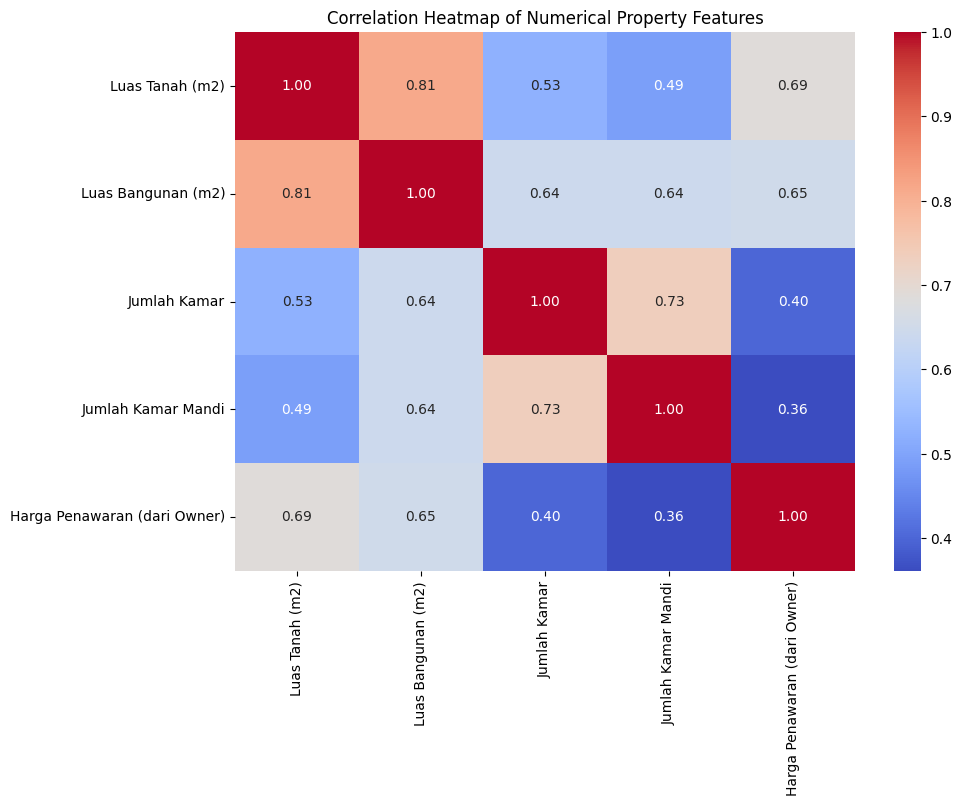

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
numeric_cols = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 
                'Jumlah Kamar', 'Jumlah Kamar Mandi', 
                'Harga Penawaran (dari Owner)']

plt.figure(figsize=(10, 7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Property Features')
plt.show()


Berdasarkan heatmap korelasi, terlihat hubungan sangat kuat antara “Luas Tanah” dan “Luas Bangunan” (r > 0.8),
menunjukkan bahwa properti dengan lahan lebih besar umumnya memiliki bangunan lebih luas.
Selain itu, Harga Penawaran juga berkorelasi positif dengan kedua variabel tersebut,
yang berarti semakin besar ukuran tanah dan bangunan, semakin tinggi harga properti.
Korelasi moderat dengan “Jumlah Kamar” dan “Jumlah Kamar Mandi” menunjukkan bahwa ukuran rumah masih menjadi faktor utama penentu harga,
sedangkan jumlah ruangan lebih bersifat pelengkap, bukan pendorong utama nilai jual.

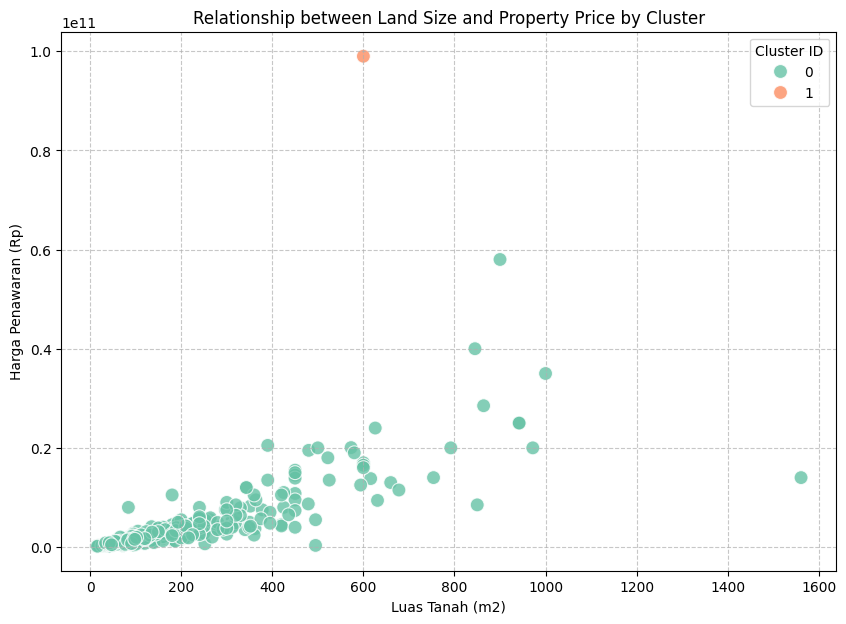

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df, 
    x='Luas Tanah (m2)', 
    y='Harga Penawaran (dari Owner)', 
    hue='Agglo', 
    palette='Set2', 
    s=100, 
    alpha=0.8
)

plt.title('Relationship between Land Size and Property Price by Cluster')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (Rp)')
plt.legend(title='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



Scatter plot menunjukkan hubungan yang jelas antara ukuran tanah (scaled) dan harga penawaran (scaled).
Sebagian besar titik data terkonsentrasi di bagian bawah grafik, yaitu Cluster 0,
yang menggambarkan properti berukuran kecil hingga sedang dengan harga relatif menengah.
Di sisi lain, terdapat satu titik terpisah jauh (Cluster 1),
mewakili properti berukuran besar dan berharga tinggi yang menonjol di luar distribusi umum.
Pola ini menegaskan hasil clustering sebelumnya bahwa pasar properti terbagi menjadi dua segmen utama:
Cluster 0: Properti menengah yang homogen dan jumlahnya dominan.
Cluster 1: Properti premium yang sangat berbeda secara ukuran maupun harga.
Dalam konteks manajerial, temuan ini berarti pengembang dapat:
Fokus menjual mass market di segmen Cluster 0 (pasar stabil & besar).
Mengembangkan strategi exclusive marketing untuk Cluster 1 (pasar niche & high value).